In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from pathlib import Path as path

import warnings
warnings.filterwarnings('ignore')

In [2]:
# paths for the directories
home_dir = path.cwd().parent                                  # home directory
data_dir = home_dir / 'data'                                  # data directory
iterim_data_dir = data_dir / 'interim'                        # interim data directory path
dataset_path = iterim_data_dir / "flat-house-dataset_v2.csv"  # dataset path

In [3]:
# loading the dataset into pandas dataframe
df = pd.read_csv(dataset_path)

# checking few rows from the dataset
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.95,5491.0,3.0,3,2,9.0,Relatively New,1730.00,0,0,0,0,0,0,65
1,flat,experion the heartsong,sector 108,1.68,8387.0,3.0,3,3+,4.0,Relatively New,1338.29,1,0,0,1,0,0,86
2,flat,umang winter hills,sector 77,0.75,5589.0,2.0,2,2,8.0,Relatively New,1140.00,0,0,0,0,1,0,102
3,flat,shree vardhman flora,sector 90,0.92,4718.0,3.0,3,2,6.0,Relatively New,2194.00,0,0,0,1,0,0,49
4,flat,dlf park place,sector 54,4.85,30180.0,3.0,4,3+,6.0,Moderately New,1607.00,1,0,0,0,0,1,158


In [4]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (3546, 18)


In [5]:
# removing the `society` and `price_per_sqft` column and creating a training dataset
# if user knows the `price_per_sqft` value, then eventually he knows the price, then why would he use our application for price prediction?

# if wishes a particular `society`, then he will contact directly to the society and will equire about the exact price.

# also these features are highly correlated with the `price` feature (target feature)
train_df = df.drop(columns=['society', 'price_per_sqft'])

In [6]:
# checking few rows from the training data
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score
0,flat,sector 78,0.95,3.0,3,2,9.0,Relatively New,1730.00,0,0,0,0,0,0,65
1,flat,sector 108,1.68,3.0,3,3+,4.0,Relatively New,1338.29,1,0,0,1,0,0,86
2,flat,sector 77,0.75,2.0,2,2,8.0,Relatively New,1140.00,0,0,0,0,1,0,102
3,flat,sector 90,0.92,3.0,3,2,6.0,Relatively New,2194.00,0,0,0,1,0,0,49
4,flat,sector 54,4.85,3.0,4,3+,6.0,Moderately New,1607.00,1,0,0,0,0,1,158


### Luxury Score

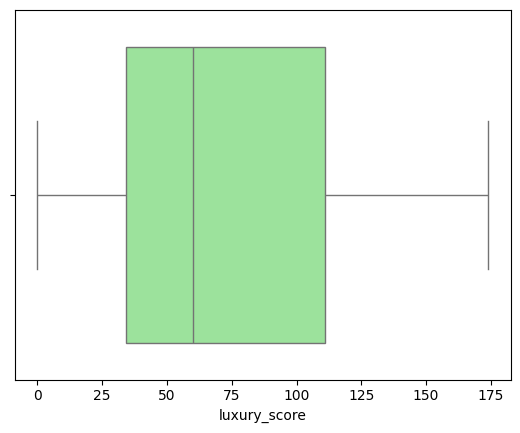

In [7]:
sns.boxplot(df['luxury_score'], orient='h', color='lightgreen');

In [8]:
# we have the `luxury` score in numerical values, we will split those numbers into bins
# as user can't enter the exact number for the luxury score, \
# he may choose the bin he is interested in, which will be more clear for the user

def categorize_luxury(score:int)->str:
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None

In [9]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [10]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score,luxury_category
0,flat,sector 78,0.95,3.0,3,2,9.0,Relatively New,1730.00,0,0,0,0,0,0,65,Medium
1,flat,sector 108,1.68,3.0,3,3+,4.0,Relatively New,1338.29,1,0,0,1,0,0,86,Medium
2,flat,sector 77,0.75,2.0,2,2,8.0,Relatively New,1140.00,0,0,0,0,1,0,102,Medium
3,flat,sector 90,0.92,3.0,3,2,6.0,Relatively New,2194.00,0,0,0,1,0,0,49,Low
4,flat,sector 54,4.85,3.0,4,3+,6.0,Moderately New,1607.00,1,0,0,0,0,1,158,High


### floorNum

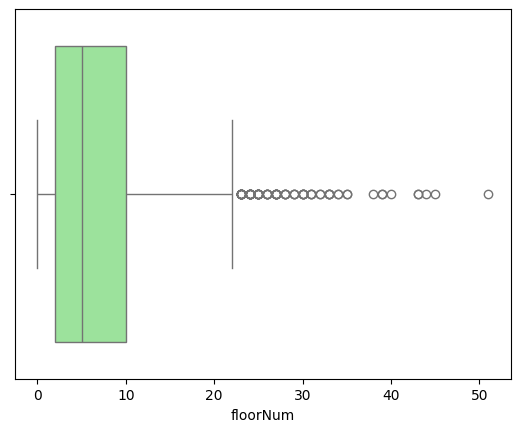

In [11]:
sns.boxplot(df['floorNum'], orient='h', color='lightgreen');

In [12]:
# we convert the floorNum into buckets as well
def categorize_floor(floor:float|int)-> str|bool:
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None # or "Undefined" or any other label for floors outside the defined bins

In [13]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [14]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 78,0.95,3.0,3,2,9.0,Relatively New,1730.00,0,0,0,0,0,0,65,Medium,Mid Floor
1,flat,sector 108,1.68,3.0,3,3+,4.0,Relatively New,1338.29,1,0,0,1,0,0,86,Medium,Mid Floor
2,flat,sector 77,0.75,2.0,2,2,8.0,Relatively New,1140.00,0,0,0,0,1,0,102,Medium,Mid Floor
3,flat,sector 90,0.92,3.0,3,2,6.0,Relatively New,2194.00,0,0,0,1,0,0,49,Low,Mid Floor
4,flat,sector 54,4.85,3.0,4,3+,6.0,Moderately New,1607.00,1,0,0,0,0,1,158,High,Mid Floor


In [15]:
train_df['floor_category'].value_counts()

floor_category
Mid Floor     1794
Low Floor      949
High Floor     803
Name: count, dtype: int64

In [16]:
train_df.drop(columns=['floorNum', 'luxury_score'], inplace=True)

In [17]:
from sklearn.preprocessing import OrdinalEncoder

# create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical column
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['sector 1', 'sector 102', 'sector 103', 'sector 104', 'sector 105',
       'sector 106', 'sector 107', 'sector 108', 'sector 109',
       'sector 10a', 'sector 11', 'sector 110', 'sector 111',
       'sector 112', 'sector 113', 'sector 12', 'sector 13', 'sector 14',
       'sector 15', 'sector 17', 'sector 17a', 'sector 17b', 'sector 2',
       'sector 21', 'sector 22', 'sector 23', 'sector 24', 'sector 25',
       'sector 26', 'sector 27', 'sector 28', 'sector 3', 'sector 30',
       'sector 31', 'sector 33', 'sector 36', 'sector 36a', 'sector 37',
       'sector 37c', 'sector 37d', 'sector 38', 'sector 39', 'sector 4',
       'sector 40', 'sector 41', 'sector 43', 'sector 45', 'sector 46',
       'sector 47', 'sector 48', 'sector 49', 'sector 5', 'sector 50',
       'sector 51', 'sector 52', 'sector 53', 'sector 54', 'sector 55',
       'sector 56', 'sector 57', 'sector 58', 'sector 59', 'sector 6',
       'sector 60', 'sector 61', 'se

In [18]:
# input data
X_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_category,floor_category
0,0.0,83.0,3.0,3,2.0,3.0,1730.00,0,0,0,0,0,0,2.0,2.0
1,0.0,7.0,3.0,3,4.0,3.0,1338.29,1,0,0,1,0,0,2.0,2.0
2,0.0,82.0,2.0,2,2.0,3.0,1140.00,0,0,0,0,1,0,2.0,2.0
3,0.0,98.0,3.0,3,2.0,3.0,2194.00,0,0,0,1,0,0,1.0,2.0
4,0.0,56.0,3.0,4,4.0,0.0,1607.00,1,0,0,0,0,1,0.0,2.0


In [19]:
y_label.head()

0    0.95
1    1.68
2    0.75
3    0.92
4    4.85
Name: price, dtype: float64

## Feature Selection Technqiues

### Technique 1: Correlation Analysis

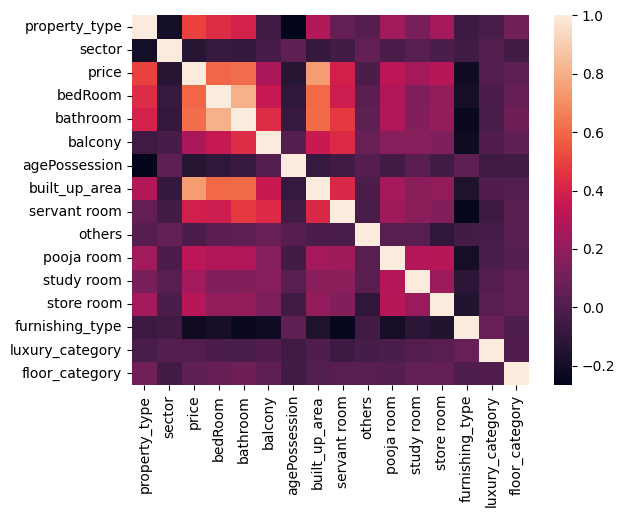

In [20]:
sns.heatmap(data_label_encoded.corr());

In [40]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature', 'price': 'corr_coeff'})
fi_df1

,feature,corr_coeff
0,sector,-0.137189
1,price,1.000000
2,bedRoom,0.590956
3,bathroom,0.609643
4,balcony,0.268523
5,agePossession,-0.134544
6,built_up_area,0.747286
7,servant room,0.391021
8,others,-0.012649
9,pooja room,0.319831


### Technique 2: Random Forest Feature Importance

In [22]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract Feature Importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_ 
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.649296
1,sector,0.107238
0,property_type,0.101526
3,bathroom,0.026769
2,bedRoom,0.024638
7,servant room,0.019836
5,agePossession,0.014242
4,balcony,0.012716
11,store room,0.008569
13,luxury_category,0.007134


### Technique 3: Gradient Boosting Feature Importance

In [46]:
from sklearn.ensemble import GradientBoostingRegressor

# train a Random forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature extraction score for labeled encoded data
fi_df3 = pd.DataFrame({
    'feature':X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.678251
1,sector,0.102689
0,property_type,0.098350
2,bedRoom,0.037559
3,bathroom,0.035137
7,servant room,0.024189
11,store room,0.009901
5,agePossession,0.006136
10,study room,0.002505
12,furnishing_type,0.001604


### Technique 4: Permutation Importance

In [24]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on labeled encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# organize the results into dataframe
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.643903
0,property_type,0.166777
1,sector,0.141553
7,servant room,0.037312
2,bedRoom,0.021125
11,store room,0.006091
3,bathroom,0.005544
14,floor_category,0.004003
5,agePossession,0.003315
9,pooja room,0.003012


### Technique 5: Lasso

In [25]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# standaridizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# train a Losso regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract Coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5

,feature,lasso_coeff
6,built_up_area,1.505709
0,property_type,0.711104
3,bathroom,0.282255
11,store room,0.200525
10,study room,0.177200
7,servant room,0.169197
9,pooja room,0.072988
13,luxury_category,0.051349
2,bedRoom,0.023898
5,agePossession,-0.000000


### Technique 6: RFE

In [26]:
# Feature ranking with recursive feature elimination.
from sklearn.feature_selection import RFE 

# Initialize the base estimator
estimator = RandomForestRegressor()

In [27]:
# Feature ranking with recursive feature elimination.
from sklearn.feature_selection import RFE 

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the Lable-Encoded and standaridized training data
selector_label = RFE(estimator=estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the co-efficient for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a Dataframe
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6

,feature,rfe_score
6,built_up_area,0.649208
1,sector,0.108168
0,property_type,0.101134
3,bathroom,0.027325
2,bedRoom,0.026151
7,servant room,0.019117
5,agePossession,0.013656
4,balcony,0.011865
10,study room,0.008142
13,luxury_category,0.007562


### Technique 7: Linear Regression Weights

In [29]:
from sklearn.linear_model import LinearRegression
#  Train a linear regression model on the label-encoded and standardized training data
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract Coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7

,feature,reg_coeffs
6,built_up_area,1.508430
0,property_type,0.710568
3,bathroom,0.289030
11,store room,0.205064
10,study room,0.185471
7,servant room,0.178810
9,pooja room,0.075690
13,luxury_category,0.062611
2,bedRoom,0.027394
5,agePossession,0.001040


### Technique 8: SHAP

In [30]:
# installing SHAP library
%pip install shap -qqq

Note: you may need to restart the kernel to use updated packages.


In [33]:
import shap

# compute SHAP values using trained random forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)
# summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[-2.18326329e-01, -3.44140144e-01, -2.51668643e-02, ...,
        -3.20214886e-04, -6.39869546e-03, -1.70745434e-02],
       [-2.79494010e-01, -1.31414614e-01, -7.99573073e-03, ...,
         3.68483443e-02,  9.34507309e-03, -2.22806088e-02],
       [-1.82764206e-01, -2.17369304e-01, -4.52278253e-02, ...,
         1.06852310e-02, -2.36860172e-03, -1.74008710e-02],
       ...,
       [-1.96979495e-01,  5.81110876e-01, -7.39177001e-02, ...,
        -8.11145427e-03, -1.77260334e-02, -2.10565999e-02],
       [-1.78366664e-01, -7.39507756e-02, -5.72883167e-02, ...,
        -1.00397313e-02, -3.43516607e-03, -1.03012117e-02],
       [-1.86407559e-01, -4.03465985e-01, -5.02563826e-02, ...,
        -7.92958784e-03,  1.20310841e-03, -5.38073880e-03]])

In [34]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.254565
0,property_type,0.478118
1,sector,0.369522
3,bathroom,0.124753
7,servant room,0.093364
2,bedRoom,0.056766
4,balcony,0.037343
5,agePossession,0.026361
14,floor_category,0.024564
12,furnishing_type,0.022577


In [47]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')
final_fi_df

,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.137189,0.107238,0.102689,0.141553,-0.068174,0.108168,-0.078113,0.369522
bedRoom,0.590956,0.024638,0.037559,0.021125,0.023898,0.026151,0.027394,0.056766
bathroom,0.609643,0.026769,0.035137,0.005544,0.282255,0.027325,0.289030,0.124753
balcony,0.268523,0.012716,0.001569,0.001892,-0.044968,0.011865,-0.067999,0.037343
agePossession,-0.134544,0.014242,0.006136,0.003315,-0.000000,0.013656,0.001040,0.026361
built_up_area,0.747286,0.649296,0.678251,0.643903,1.505709,0.649208,1.508430,1.254565
servant room,0.391021,0.019836,0.024189,0.037312,0.169197,0.019117,0.178810,0.093364
others,-0.012649,0.003099,0.000516,0.000563,-0.011777,0.002631,-0.019382,0.006353
pooja room,0.319831,0.005340,0.000244,0.003012,0.072988,0.005676,0.075690,0.009844


In [48]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [49]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.708669
sector             0.138916
bathroom           0.033107
servant room       0.031623
bedRoom            0.029968
agePossession      0.010870
balcony            0.009846
store room         0.008699
floor_category     0.006375
study room         0.005839
luxury_category    0.005337
furnishing_type    0.004473
pooja room         0.004147
others             0.002130
dtype: float64

In [50]:
# to drop pooja room, study room, others
X_label

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,others,pooja room,study room,store room,furnishing_type,luxury_category,floor_category
0,0.0,83.0,3.0,3,2.0,3.0,1730.00,0,0,0,0,0,0,2.0,2.0
1,0.0,7.0,3.0,3,4.0,3.0,1338.29,1,0,0,1,0,0,2.0,2.0
2,0.0,82.0,2.0,2,2.0,3.0,1140.00,0,0,0,0,1,0,2.0,2.0
3,0.0,98.0,3.0,3,2.0,3.0,2194.00,0,0,0,1,0,0,1.0,2.0
4,0.0,56.0,3.0,4,4.0,0.0,1607.00,1,0,0,0,0,1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,0.0,52.0,3.0,3,2.0,3.0,1239.00,0,0,0,0,1,0,2.0,2.0
3542,0.0,42.0,2.0,2,1.0,3.0,1069.00,0,0,0,0,0,0,1.0,2.0
3543,0.0,64.0,2.0,2,2.0,4.0,1350.00,0,0,0,1,0,2,2.0,1.0
3544,0.0,22.0,2.0,2,2.0,3.0,619.00,0,0,0,0,0,2,1.0,2.0


In [51]:
# with all the columns
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [52]:
scores.mean()

0.8115970825637134

In [54]:
X_label.columns

Index(['property_type', 'sector', 'bedRoom', 'bathroom', 'balcony',
       'agePossession', 'built_up_area', 'servant room', 'others',
       'pooja room', 'study room', 'store room', 'furnishing_type',
       'luxury_category', 'floor_category'],
      dtype='object')

In [55]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [56]:
scores.mean()

0.809941844765276

In [57]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [ ]:
# saving the dataset
interim_dir = data_dir / 'interim'
file_name = interim_dir / 'flat-house-dataset_v2.csv'

export_df.to_csv(file_name, index=False)

In [58]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,83.0,3.0,3,2.0,3.0,1730.00,0,0,0,2.0,2.0,0.95
1,0.0,7.0,3.0,3,4.0,3.0,1338.29,1,0,0,2.0,2.0,1.68
2,0.0,82.0,2.0,2,2.0,3.0,1140.00,0,1,0,2.0,2.0,0.75
3,0.0,98.0,3.0,3,2.0,3.0,2194.00,0,0,0,1.0,2.0,0.92
4,0.0,56.0,3.0,4,4.0,0.0,1607.00,1,0,1,0.0,2.0,4.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,0.0,52.0,3.0,3,2.0,3.0,1239.00,0,1,0,2.0,2.0,1.40
3542,0.0,42.0,2.0,2,1.0,3.0,1069.00,0,0,0,1.0,2.0,0.32
3543,0.0,64.0,2.0,2,2.0,4.0,1350.00,0,0,2,2.0,1.0,1.47
3544,0.0,22.0,2.0,2,2.0,3.0,619.00,0,0,2,1.0,2.0,0.27
